<a href="https://colab.research.google.com/github/d4k5h-BITSPILANI/sentiment-Analysis/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install snntorch torch torchvision matplotlib

  Using cached snntorch-0.9.4-py2.py3-none-any.whl.metadata (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-ma

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 86.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 36.1MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 68.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.27MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



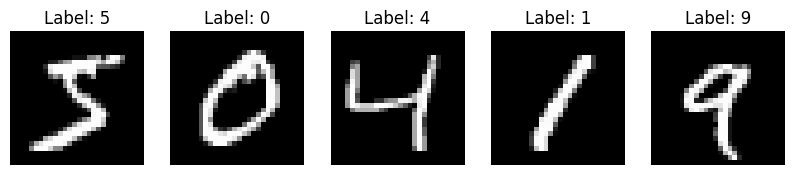

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transform: Convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.show()


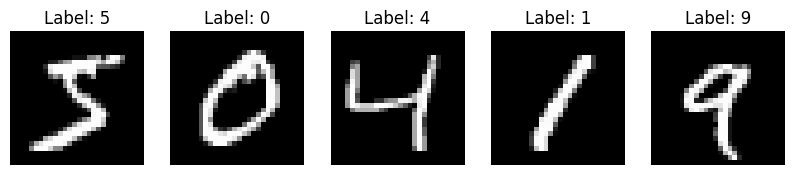

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transform: Convert images to tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.show()


In [6]:
import snntorch as snn
import torch.nn as nn

# Define the SNN Model
class BasicSNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 200)  # Input to Hidden Layer (784 -> 200 neurons)
        self.lif1 = snn.Leaky(beta=0.9)  # First spiking layer
        self.fc2 = nn.Linear(200, 10)  # Hidden to Output Layer (200 -> 10 neurons)
        self.lif2 = snn.Leaky(beta=0.9)  # Output spiking layer

    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()

        spk1, mem1 = self.lif1(self.fc1(x.view(x.shape[0], -1)), mem1)
        spk2, mem2 = self.lif2(self.fc2(spk1), mem2)

        return spk2, mem2


Epoch 1/5, Loss: 1.5657
Epoch 2/5, Loss: 1.5239
Epoch 3/5, Loss: 1.5170
Epoch 4/5, Loss: 1.5118
Epoch 5/5, Loss: 1.5105


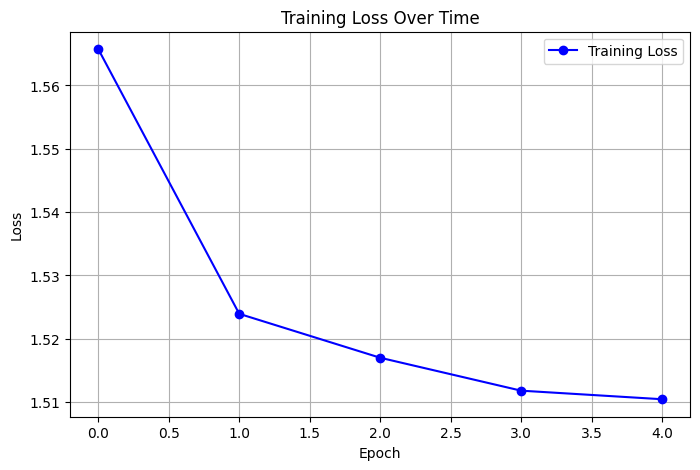

In [7]:
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
snn_model = BasicSNN().to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(snn_model.parameters(), lr=1e-3)

# Training loop
num_epochs = 5
loss_list = []

for epoch in range(num_epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        spk_out, _ = snn_model(images)
        loss = loss_fn(spk_out, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plot the Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(loss_list, marker="o", linestyle="-", color="b", label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid()
plt.show()


Test Accuracy: 91.63%


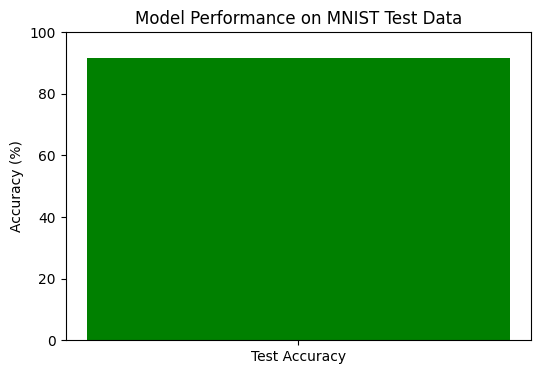

In [8]:
def test_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            spk_out, _ = model(images)
            _, predicted = torch.max(spk_out, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

accuracy = test_model(snn_model, test_loader)

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Test Accuracy"], [accuracy], color="green")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Performance on MNIST Test Data")
plt.show()


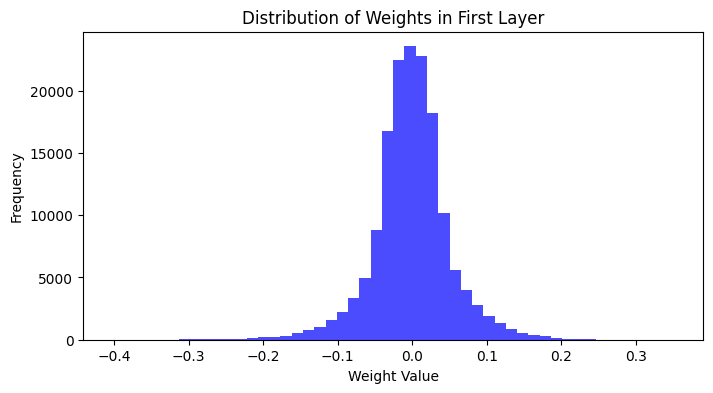

In [9]:
weights = snn_model.fc1.weight.cpu().detach().numpy().flatten()

plt.figure(figsize=(8, 4))
plt.hist(weights, bins=50, color="blue", alpha=0.7)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in First Layer")
plt.show()


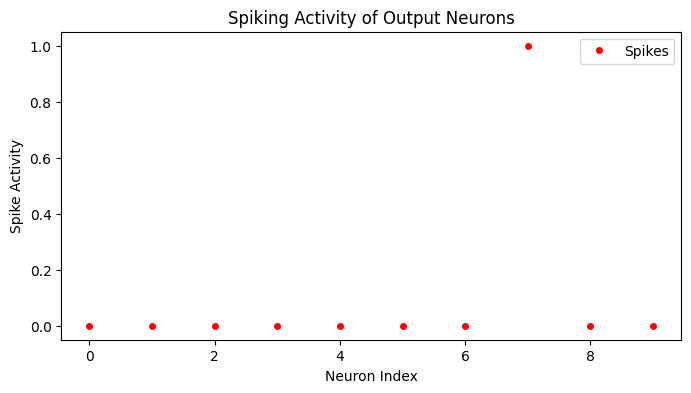

In [10]:
# Get a sample image from the test set
sample_image, _ = test_dataset[0]
sample_image = sample_image.to(device).view(1, -1)

# Forward pass through the network
spk_out, _ = snn_model(sample_image)

# Convert spike output to NumPy
spk_np = spk_out.cpu().detach().numpy().flatten()

# Plot spike activity
plt.figure(figsize=(8, 4))
plt.plot(spk_np, "ro", markersize=4, label="Spikes")
plt.xlabel("Neuron Index")
plt.ylabel("Spike Activity")
plt.title("Spiking Activity of Output Neurons")
plt.legend()
plt.show()


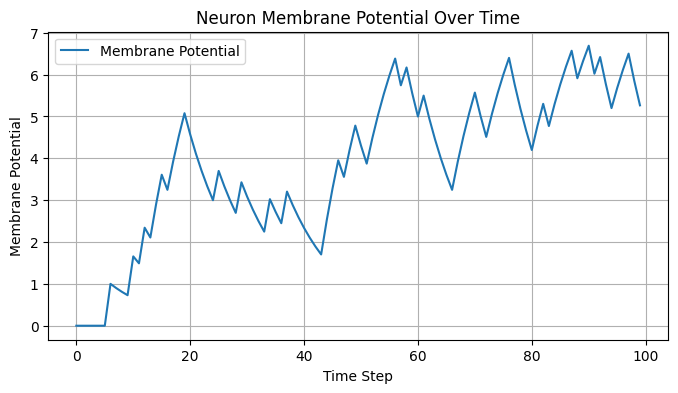

In [11]:
import numpy as np

# Simulate a neuron receiving input spikes over time
timesteps = 100
inputs = torch.randint(0, 2, (timesteps,))  # Random input spikes (0 or 1)
beta = 0.9  # Leak factor
mem_potential = np.zeros(timesteps)

# Compute membrane potential over time
for t in range(1, timesteps):
    mem_potential[t] = beta * mem_potential[t - 1] + inputs[t]

# Plot membrane potential over time
plt.figure(figsize=(8, 4))
plt.plot(mem_potential, label="Membrane Potential")
plt.xlabel("Time Step")
plt.ylabel("Membrane Potential")
plt.title("Neuron Membrane Potential Over Time")
plt.legend()
plt.grid()
plt.show()
